import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [2]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_1000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [3]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (10787, 20)




In [4]:
FOLDS = 10
TRAIN_SIZE = 0.8


# MLP

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [6]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 127
Número de audios diferentes 1000
### Info TRAIN
X (8377, 20)
Groups 101
Tracks 776
### Info TEST
X (2410, 20)
Groups 26
Tracks 224


# Probamos multiples combinaciones

##  hidden_layer_sizes 36,36

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36))
model_trained_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

Accuracy:  0.30357142857142855 


classification report :
               precision    recall  f1-score   support

         0.0       0.22      0.84      0.34        43
         1.0       0.89      0.18      0.30        44
         2.0       0.75      0.06      0.11        49
         3.0       0.39      0.27      0.32        41
         4.0       0.62      0.21      0.32        47

    accuracy                           0.30       224
   macro avg       0.57      0.31      0.28       224
weighted avg       0.58      0.30      0.27       224



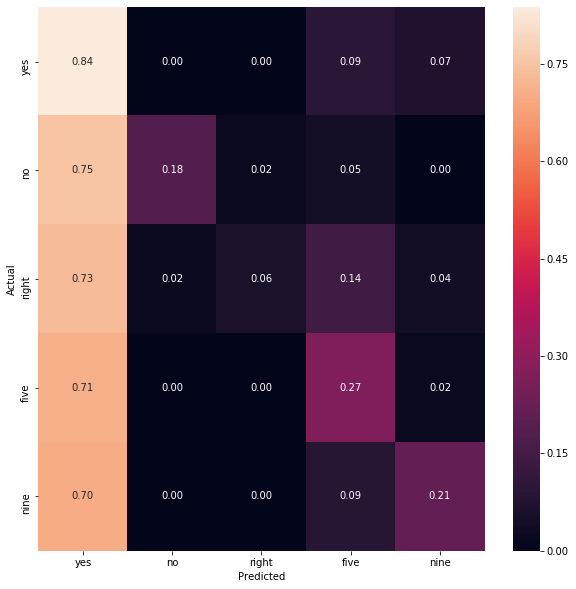

              precision    recall  f1-score   support

         0.0       0.22      0.84      0.34        43
         1.0       0.89      0.18      0.30        44
         2.0       0.75      0.06      0.11        49
         3.0       0.39      0.27      0.32        41
         4.0       0.62      0.21      0.32        47

    accuracy                           0.30       224
   macro avg       0.57      0.31      0.28       224
weighted avg       0.58      0.30      0.27       224



In [16]:
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36)
print(report)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

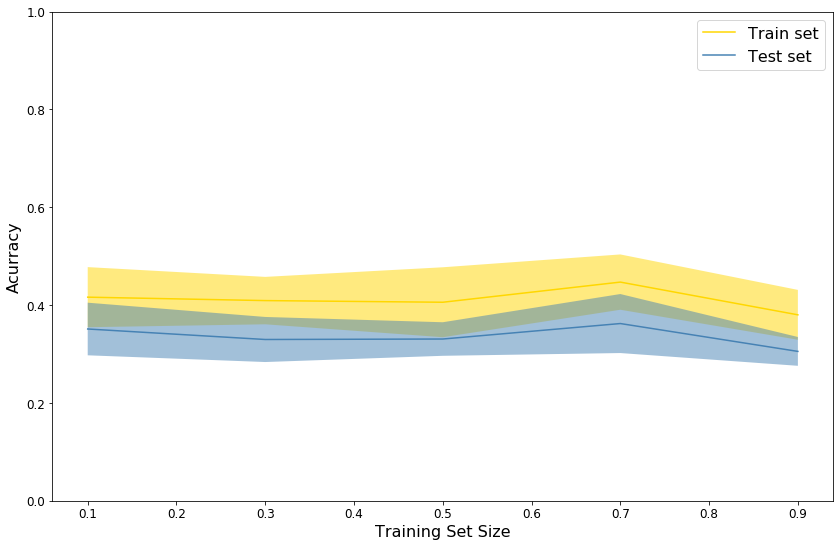

In [9]:
df_split_params = PIPELINE.learning_curve(model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)


##  hidden_layer_sizes 36,36,36

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

Accuracy:  0.29017857142857145 


classification report :
               precision    recall  f1-score   support

         0.0       1.00      0.02      0.05        43
         1.0       1.00      0.11      0.20        44
         2.0       0.50      0.16      0.25        49
         3.0       0.21      0.95      0.34        41
         4.0       0.80      0.26      0.39        47

    accuracy                           0.29       224
   macro avg       0.70      0.30      0.24       224
weighted avg       0.70      0.29      0.25       224



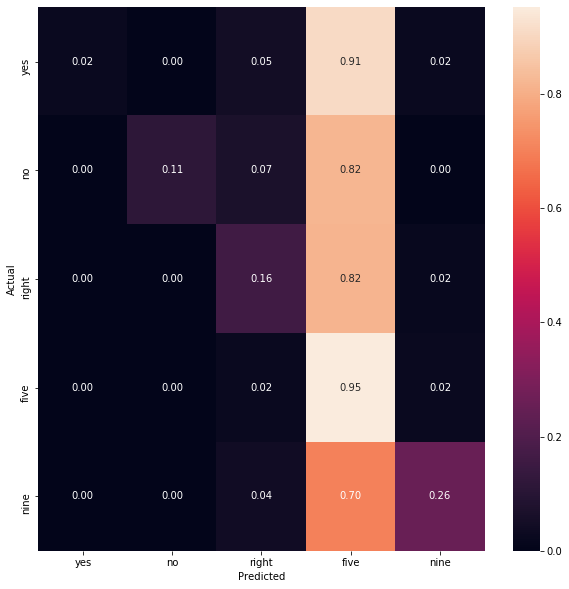

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.05        43
         1.0       1.00      0.11      0.20        44
         2.0       0.50      0.16      0.25        49
         3.0       0.21      0.95      0.34        41
         4.0       0.80      0.26      0.39        47

    accuracy                           0.29       224
   macro avg       0.70      0.30      0.24       224
weighted avg       0.70      0.29      0.25       224



In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36,36))
model_trained_36_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36_36)
print(report)

##  hidden_layer_sizes 32,32

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

Accuracy:  0.38392857142857145 


classification report :
               precision    recall  f1-score   support

         0.0       0.30      0.49      0.38        43
         1.0       0.40      0.23      0.29        44
         2.0       0.39      0.57      0.46        49
         3.0       0.33      0.37      0.34        41
         4.0       1.00      0.26      0.41        47

    accuracy                           0.38       224
   macro avg       0.48      0.38      0.38       224
weighted avg       0.49      0.38      0.38       224



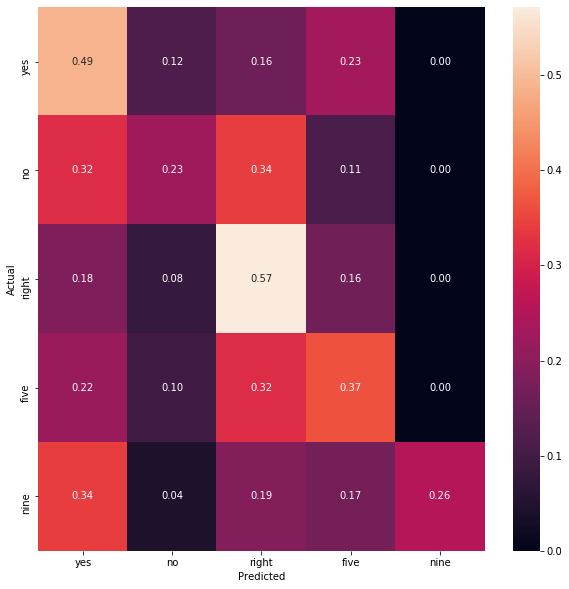

              precision    recall  f1-score   support

         0.0       0.30      0.49      0.38        43
         1.0       0.40      0.23      0.29        44
         2.0       0.39      0.57      0.46        49
         3.0       0.33      0.37      0.34        41
         4.0       1.00      0.26      0.41        47

    accuracy                           0.38       224
   macro avg       0.48      0.38      0.38       224
weighted avg       0.49      0.38      0.38       224



In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
model_trained_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32)
print(report)

##  hidden_layer_sizes 32,32,32

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

Accuracy:  0.42410714285714285 


classification report :
               precision    recall  f1-score   support

         0.0       0.58      0.44      0.50        43
         1.0       0.67      0.32      0.43        44
         2.0       0.31      0.88      0.46        49
         3.0       0.00      0.00      0.00        41
         4.0       0.70      0.40      0.51        47

    accuracy                           0.42       224
   macro avg       0.45      0.41      0.38       224
weighted avg       0.46      0.42      0.39       224



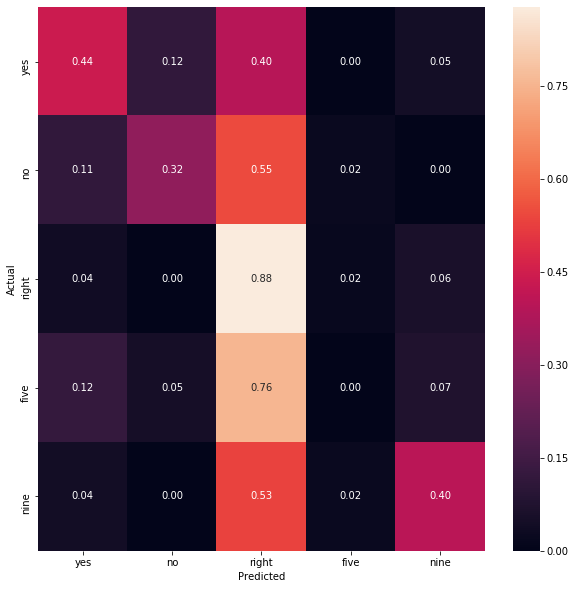

              precision    recall  f1-score   support

         0.0       0.58      0.44      0.50        43
         1.0       0.67      0.32      0.43        44
         2.0       0.31      0.88      0.46        49
         3.0       0.00      0.00      0.00        41
         4.0       0.70      0.40      0.51        47

    accuracy                           0.42       224
   macro avg       0.45      0.41      0.38       224
weighted avg       0.46      0.42      0.39       224



In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32))
model_trained_32_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32_32)
print(report)

##  hidden_layer_sizes 40,40

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

Accuracy:  0.40625 


classification report :
               precision    recall  f1-score   support

         0.0       0.61      0.26      0.36        43
         1.0       0.49      0.41      0.44        44
         2.0       0.48      0.41      0.44        49
         3.0       0.26      0.71      0.38        41
         4.0       0.87      0.28      0.42        47

    accuracy                           0.41       224
   macro avg       0.54      0.41      0.41       224
weighted avg       0.55      0.41      0.41       224



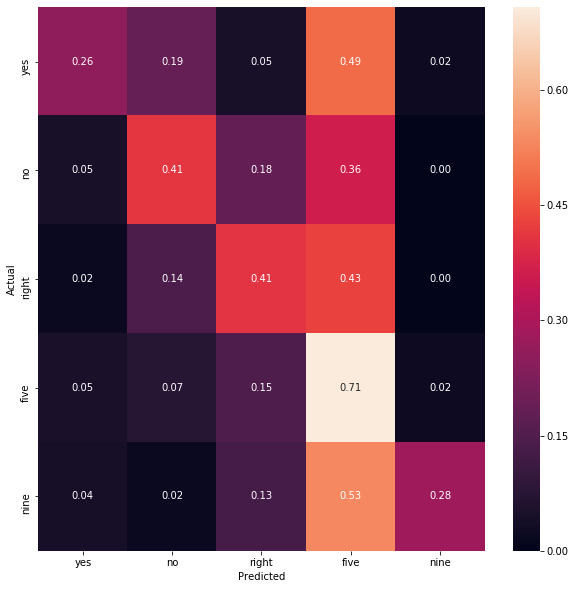

              precision    recall  f1-score   support

         0.0       0.61      0.26      0.36        43
         1.0       0.49      0.41      0.44        44
         2.0       0.48      0.41      0.44        49
         3.0       0.26      0.71      0.38        41
         4.0       0.87      0.28      0.42        47

    accuracy                           0.41       224
   macro avg       0.54      0.41      0.41       224
weighted avg       0.55      0.41      0.41       224



In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40))
model_trained_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40)
print(report)

##  hidden_layer_sizes 40,40,40

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

Accuracy:  0.38392857142857145 


classification report :
               precision    recall  f1-score   support

         0.0       0.56      0.23      0.33        43
         1.0       0.78      0.16      0.26        44
         2.0       0.28      0.82      0.41        49
         3.0       0.44      0.29      0.35        41
         4.0       0.68      0.36      0.47        47

    accuracy                           0.38       224
   macro avg       0.55      0.37      0.37       224
weighted avg       0.54      0.38      0.37       224



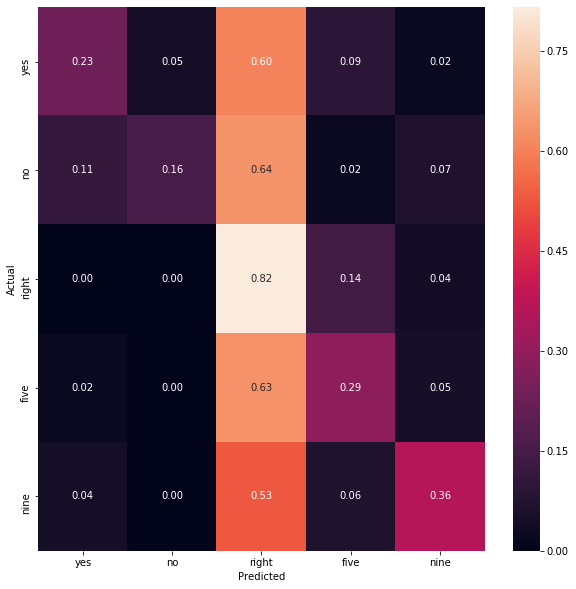

              precision    recall  f1-score   support

         0.0       0.56      0.23      0.33        43
         1.0       0.78      0.16      0.26        44
         2.0       0.28      0.82      0.41        49
         3.0       0.44      0.29      0.35        41
         4.0       0.68      0.36      0.47        47

    accuracy                           0.38       224
   macro avg       0.55      0.37      0.37       224
weighted avg       0.54      0.38      0.37       224



In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40))
model_trained_40_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40_40)
print(report)

### La mejor combinación de parametros

#Seleccionamos el modelo con el acurracy mas alto

model_trained_36_36 : Accuracy:  0.30357142857142855 
model_trained_36_36_36: Accuracy:  0.29017857142857145
model_trained_32_32 : Accuracy:  0.38392857142857145 
model_trained_32_32_32 : Accuracy:  0.42410714285714285  # MAS ALTO
model_trained_40_40 : Accuracy:  0.40625 
model_trained_40_40_40:  Accuracy:  0.38392857142857145 

In [23]:
best_model_trained = model_trained_32_32_32

## 2. Evalución mejor modelo con el conjunto de test

Accuracy:  0.42410714285714285 


classification report :
               precision    recall  f1-score   support

         0.0       0.58      0.44      0.50        43
         1.0       0.67      0.32      0.43        44
         2.0       0.31      0.88      0.46        49
         3.0       0.00      0.00      0.00        41
         4.0       0.70      0.40      0.51        47

    accuracy                           0.42       224
   macro avg       0.45      0.41      0.38       224
weighted avg       0.46      0.42      0.39       224



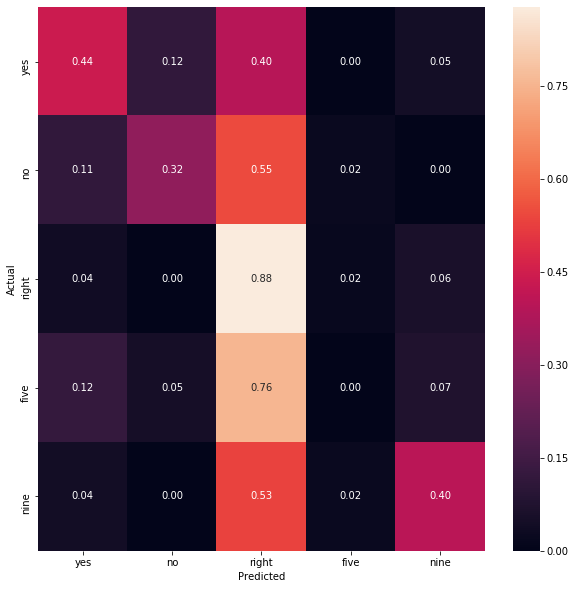

              precision    recall  f1-score   support

         0.0       0.58      0.44      0.50        43
         1.0       0.67      0.32      0.43        44
         2.0       0.31      0.88      0.46        49
         3.0       0.00      0.00      0.00        41
         4.0       0.70      0.40      0.51        47

    accuracy                           0.42       224
   macro avg       0.45      0.41      0.38       224
weighted avg       0.46      0.42      0.39       224



In [24]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

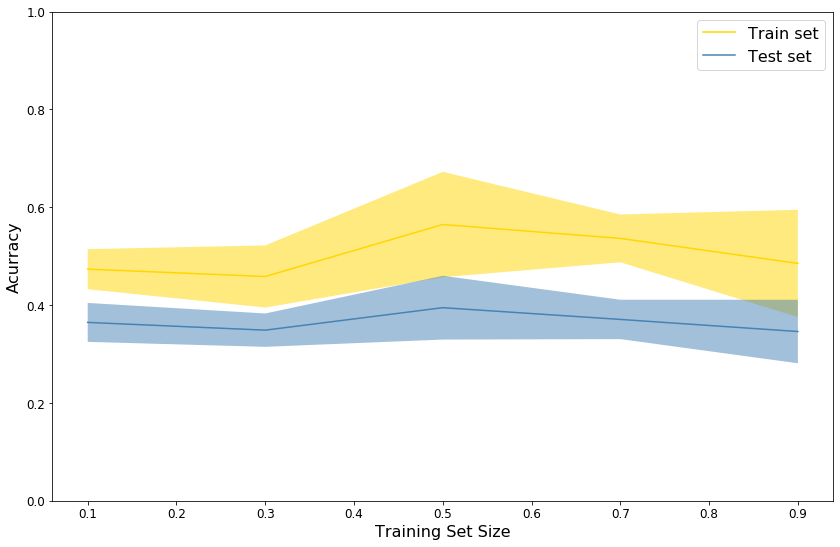

In [25]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

In [27]:
df_split_params

,Train_Size,mean_train_Accuracy,mean_test_Accuracy,std_train_Accuracy,std_test_Accuracy
0,0.1,0.473474,0.364645,0.040952,0.039802
1,0.3,0.458494,0.348791,0.063466,0.034058
2,0.5,0.564754,0.394746,0.107698,0.065173
3,0.7,0.536377,0.370728,0.048868,0.040232
4,0.9,0.485197,0.346010,0.109662,0.064903
